<a href="https://colab.research.google.com/github/IMOKURI/signate-471/blob/main/%E5%8C%BB%E5%AD%A6%E8%AB%96%E6%96%87%E3%81%AE%E8%87%AA%E5%8B%95%E4%BB%95%E5%88%86%E3%81%91%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this notebook ...

competition site: https://signate.jp/competitions/471







## ToDo

- [ ] pre train のモデルの save と load
- [ ] preprocess したデータの save と load (wandb)
- [ ] optuna の seed 固定 https://book-read-yoshi.hatenablog.com/entry/2021/03/22/lightgbm_optuna_deterministic

### Idea

- [x] [ラベル判定結果の誤りに関するお知らせ](https://signate.jp/competitions/471/discussions/20210816152356-59) をとりこむ 
- [x] 分類で推論、回帰で推論
- [x] 回帰の場合の境界値の最適化
    - [x] second stage で学習べきかも
        - [ ] heamy という stacking のライブラリがある
        - [ ] CNN で stacking がいいかもしれない https://tawara.hatenablog.com/entry/2020/12/16/132415
            - 縦・横、チャネル数が、クラス数（１）・モデル数（ｎ）・１で、 1xn で畳み込む 
        - [x] lightGBM
    - [x] Nelder-Mead 法 という最適化手法を調べる
- [x] 最適な境界値はモデルによって異なるので、アンサンブルの時は、 vote ensemble がいいかもしれない
- [x] アブストで事前学習して、タイトルでメイン学習 https://www.kaggle.com/maunish/clrp-pytorch-roberta-pretrain
    - 事前学習は、Masked LM
- [x] タイトルだけで学習・推論
- [x] タイトル + アブストで学習・推論
    - [ ] タイトルだけで推論したのとアンサンブルができる
    - [ ] Longformer がいいかもしれない `allenai/longformer-base-4096`
    - [x] large モデルためす
- [ ] アブスト + タイトル で学習・推論
- [ ] アブストが空 or not でモデルわける
- [ ] アブストの max length 調整
    - [ ] 途中で切る。デフォルトの 512 はありそう。ほとんどのアブストがその長さで収まる
    - [ ] 要約する方法があるかなぁ
- [x] dropout を 0 にする
- [x] gradient cripping を 0.2 or 0.5 で試す
- [ ] re-initialization
    - This paper (https://arxiv.org/pdf/2006.05987.pdf) shows that fine-tuning with reinitialization last N layers works well.
    - Different models have different optimal N. Almost models set N=4~5, gpt2-models set N=6.
    - https://github.com/kurupical/commonlit/blob/8781139c8ed4cc59f7c7ac9d97c72c351ee91377/exp/exp502.py#L497
- [ ] Pre trained なレイヤーのfreeze https://raphaelb.org/posts/freezing-bert/
    - データ数が 数百 しかないような環境での話かな。
- [ ] Recall を伸ばすための loss function は考えられるか。 https://openreview.net/pdf?id=SlprFTIQP3
    - [x] f1 score を微分可能にして、 loss 関数に使うアプローチ https://gist.github.com/SuperShinyEyes/dcc68a08ff8b615442e3bc6a9b55a354 https://towardsdatascience.com/the-unknown-benefits-of-using-a-soft-f1-loss-in-classification-systems-753902c0105d
    - [ ] epoch ごとに beta の値を増やしていく epoch * 2 とか
- [ ] 出現する単語のクラスタリング
- [x] TF-IDF して、 リッジ回帰 → ベースライン2 でやった
    - IF-IDF の結果もBERTの特徴量にできないだろうか
    - https://www.kaggle.com/semyonkoshkarov/tf-idf-linearsvr-baseline も参考になるかも
- [ ] 医療用語で事前学習されたモデルを使ってみる
    - [x] BioBERT https://github.com/dmis-lab/biobert `dmis-lab/biobert-base-cased-v1.1` 286k downloads
        - [ ] large モデル試す
    - [ ] Med-BERT https://github.com/ZhiGroup/Med-BERT
        - 診断精度に貢献しているかもしれない(いや、一般的な話だったｗ) https://www.nature.com/articles/s41746-021-00455-y
    - [x] `microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext` 30.8k downloads https://www.axion.zone/microsoft-researchers-claim-state-of-the-art-biomedical-nlp-model/
    - [x] `bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12` 4.3k downloads https://github.com/ncbi-nlp/bluebert
        - [ ] large モデル試す
    - [x] `emilyalsentzer/Bio_ClinicalBERT` https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT
    - [ ] `emilyalsentzer/Bio_Discharge_Summary_BERT` https://huggingface.co/emilyalsentzer/Bio_Discharge_Summary_BERT
    - [x] `lordtt13/COVID-SciBERT` https://huggingface.co/lordtt13/COVID-SciBERT
    - [x] `allenai/scibert_scivocab_uncased` https://huggingface.co/allenai/scibert_scivocab_uncased
- [ ] Augmentation https://neptune.ai/blog/data-augmentation-nlp
    - [ ] Back translation: 他言語に翻訳して、もう一回翻訳する（英語→フランス語→英語） https://qiita.com/nena0undefined/items/c2926bad07039e5540ab
        - [ ] ラベル 1 のだけやって、学習データに追加する
    - [ ] Synonym Replacement: 単語のいくつかを、同じ意味の別の単語に置き換える
        - [x] 自然言語の augmentation ができるライブラリ https://github.com/makcedward/nlpaug
- [ ] TTA
- [ ] ベースラインのシンプルさを取り戻す。(思ったよりベースラインのスコアが良かったので、それを取り込む・・・）
    - [ ] weight decay を調整 0.01 or 0


### Experiments

- BERT でアブストの　pre train をしてもスコアは上がっていない（学習の方法を工夫した方がよいかも）
- BERT Large は title の学習には大きすぎて？ loss が Base モデルに及ばない。
- epoch 3 で val loss が下がらないので、 epoch 3 で aug かけるとかありかもしれない
- `dmis-lab/biobert-base-cased-v1.1` と `bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12` の成績がよい


## Prepare for Colab

In [1]:
!nvidia-smi

Tue Sep  7 11:17:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import sys

if os.path.exists('init.txt'):
    print("Already initialized.")

else:
    if 'google.colab' in sys.modules:
        from google.colab import drive
        drive.mount('/content/drive')

        !cp /content/drive/MyDrive/Datasets/signate-471/train.csv .
        !cp /content/drive/MyDrive/Datasets/signate-471/test.csv .
        !cp /content/drive/MyDrive/Datasets/signate-471/sample_submit.csv .

    # for StratifiedGroupKFold
    # !pip uninstall -y scikit-learn
    # !pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

    # for MultilabelStratifiedKFold
    !pip install -q iterative-stratification

    # !pip install -qU 'git+https://github.com/katsura-jp/pytorch-cosine-annealing-with-warmup'

    !pip install -q wandb
    !pip install -q optuna

    !pip install -q transformers
    !pip install -q textstat
    !pip install -q nlpaug

    # https://qiita.com/_yushuu/items/83c51e29771530646659
    # !pip install -q googletrans==4.0.0-rc1

    !touch init.txt

Already initialized.


In [3]:
# Install_LightGBM_with_GPU

if os.path.exists('init_lightgbm.txt'):
    print("Already initialized.")

else:
    ! git clone --recursive https://github.com/Microsoft/LightGBM

    %cd /content/LightGBM
    ! mkdir -p build

    %cd build
    ! cmake -DUSE_GPU=1 /content/LightGBM
    ! make -j$(nproc)
    ! sudo apt-get -y install python-pip
    ! sudo -H pip install setuptools numpy scipy scikit-learn -U
    ! sudo -H pip install pandas==1.3.0

    %cd /content/LightGBM/python-package
    ! sudo python setup.py install --precompile

    %cd /content/

    !touch init_lightgbm.txt

Already initialized.


## Library

In [4]:
import glob
import json
import math
import os
import random
import re
import time
import warnings
from contextlib import contextmanager

# import lightgbm as lgb
# import optuna.integration.lightgbm as lgb
import matplotlib.pyplot as plt
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nltk
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import textstat
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers as T
import wandb
# from cosine_annealing_warmup import CosineAnnealingWarmupRestarts
# from googletrans import Translator
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error, fbeta_score
from sklearn.model_selection import KFold, StratifiedKFold  # , StratifiedGroupKFold
from torch.optim import SGD, Adam  # , AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts, ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm


In [5]:
warnings.filterwarnings("ignore")

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
netrc = "../input/wandbtoken/.netrc"

if 'google.colab' in sys.modules:
    netrc = "/content/drive/MyDrive/.netrc"

!cp -f {netrc} ~/

!wandb login

wandb: Currently logged in as: imokuri (use `wandb login --relogin` to force relogin)


In [9]:
wandb_job_type = ""
wandb_notes = ""
wandb_tags = []

## Load Data

In [10]:
DATA_DIR = "../input/signate-471/"
OUTPUT_DIR = "./"

if 'google.colab' in sys.modules:
    DATA_DIR = "./"

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [11]:
train = pd.read_csv(DATA_DIR + "train.csv")
test = pd.read_csv(DATA_DIR + "test.csv")
sub = pd.read_csv(DATA_DIR + "sample_submit.csv", header=None)
sub.columns = ["id", "judgement"]

## Config

In [12]:
class Config:
    wandb_entity = "ponkots"
    wandb_project = "signate-471"
    print_freq = 100

    pre_train = False
    train = True
    validate = False
    inference = False
    stack = False
    stack_optuna = False
    ensemble = False

    debug = True
    multi_gpu = False
    apex = False

In [13]:
if Config.stack_optuna:
    import optuna.integration.lightgbm as lgb
else:
    import lightgbm as lgb

In [14]:
if Config.pre_train:
    wandb_job_type = "pre_training"

elif Config.train:
    wandb_job_type = "training"

elif Config.inference:
    wandb_job_type = "inference"

elif Config.validate:
    wandb_job_type = "validation"

elif Config.stack:
    wandb_job_type = "stacking"

elif Config.ensemble:
    wandb_job_type = "ensemble"

In [15]:
if Config.apex:
    from apex import amp

In [16]:
# seed = random.randrange(10000)
seed = 440

print(seed)

440


In [17]:
config_defaults = {
    "seed": seed,
    "input": "title_abstract",
    "max_len": 400,
    "border": "minimize",
    "n_class": 1,
    "n_fold": 5,
    "gradient_accumulation_steps": 2,
    "max_grad_norm": 1000,
    "num_workers": 4,
    "batch_size": 12,
    "epochs": 3,
    "optimizer": "BertAdamW",
    "scheduler": "get_cosine_schedule_with_warmup",
    "criterion": "BCEWithLogitsLoss",  # "FBetaLoss",  # "BCEWithLogitsLoss",
    "lr": 2e-5,
    "min_lr": 1e-5,
    "weight_decay": 0.01,
    "dropout": 0.1,
    "model_name": "dmis-lab/biobert-base-cased-v1.1-squad",
    "reinit_layers": 0,
    "freeze_layers": 0,
    "best": "loss",  # "score",
    "inference_runs": [
        #"3rnktuhs",  # 3
        #"pnhvuu65",  # 1 (21al58cv は除外する)
        #"1zwt0m0n",  # 1
        #"38pysxqh",  # 1
        #"asrbkkjc",  # 1
        "2r4l08lu",
    ],
}

In [18]:
if Config.stack:
    config_stack = {
        "objective": "binary" if config_defaults["n_class"] == 1 else "multiclass",
        "criterion": "binary_logloss" if config_defaults["n_class"] == 1 else "multi_logloss",
    }
    config_defaults.update(config_stack)

    if not Config.stack_optuna:
        config_stack_manual = {
            "lr": 0.01,
            "max_depth": 7,
            "num_leaves": 31,
            "min_data_in_leaf": 20,
            "dropout": 0.1,
        }
        config_defaults.update(config_stack_manual)


In [19]:
if not (Config.validate or Config.inference or Config.stack or Config.ensemble):
    config_defaults["inference_runs"] = []

In [20]:
if Config.debug:
    config_defaults["epochs"] = 1
    Config.print_freq = 10

In [21]:
if config_defaults["optimizer"] == "BertAdamW":
    config_defaults["lr_69"] = 5e-5
    config_defaults["lr_133"] = 1e-4

In [22]:
# Update by epoch
# num_steps = config_defaults["epochs"]

# Update by batch
num_data = 1000 if Config.debug else len(train)
num_steps = num_data // config_defaults["n_fold"] * (config_defaults["n_fold"] - 1) // config_defaults["batch_size"] // config_defaults["gradient_accumulation_steps"] * config_defaults["epochs"]

print(num_steps)

if config_defaults["scheduler"] == "CosineAnnealingWarmRestarts":
    config_defaults["T_0"] = num_steps

elif config_defaults["scheduler"] == "CosineAnnealingLR":
    config_defaults["T_max"] = num_steps

elif config_defaults["scheduler"] == "ReduceLROnPlateau":
    config_defaults["factor"] = 0.2
    config_defaults["patience"] = 4
    config_defaults["eps"] = 1e-6

elif config_defaults["scheduler"] == "CosineAnnealingWarmupRestarts":
    config_defaults["first_cycle_steps"] = num_steps
    config_defaults["warmup_steps"] = num_steps // 10

elif config_defaults["scheduler"] == "get_cosine_schedule_with_warmup":
    config_defaults["num_training_steps"] = num_steps
    config_defaults["num_warmup_steps"] = max(50, num_steps // 10)

33


In [23]:
if Config.debug:
    run = wandb.init(entity=Config.wandb_entity, project=Config.wandb_project, config=config_defaults, mode="disabled")
else:
    run = wandb.init(entity=Config.wandb_entity, project=Config.wandb_project, config=config_defaults, notes=wandb_notes, tags=wandb_tags, job_type=wandb_job_type, save_code=True)

In [24]:
config = wandb.config

## EDA-1

In [25]:
# アブストが空っぽのが結構ある
print(train.isnull().sum())
print(test.isnull().sum())

id              0
title           0
abstract     4390
judgement       0
dtype: int64
id             0
title          0
abstract    6546
dtype: int64


## Preprocessing

In [26]:
def preprocess(data):
    
    title_abstract = []
    for e in data:

        # アルファベット以外は空白に置換します。
        e = re.sub("[^a-zA-Z]", " ", e)

        # 小文字に変換します。
        e = e.lower()

        # token に分割します。
        e = nltk.word_tokenize(e)

        # stop word を削除します。
        e = [word for word in e if not word in set(nltk.corpus.stopwords.words("english"))]

        # 見出し語化します。
        lemma = nltk.WordNetLemmatizer()
        e = [lemma.lemmatize(word) for word in e]
        e = " ".join(e)

        title_abstract.append(e)

    return title_abstract

In [27]:
def back_translation_de(data):
    print("Back Translation (en -> de -> en)")
    title_abstract = []
    back_translation_aug = naw.BackTranslationAug(
        from_model_name='facebook/wmt19-en-de', 
        to_model_name='facebook/wmt19-de-en',
        max_length=config.max_len,
        device='cuda',
    )

    for e in tqdm(data, total=len(data)):
        if random.random() < 0.1:
            try:
                title_abstract.append(back_translation_aug.augment(e))
            except Exception as e:
                print(e)
                title_abstract.append(e)
        else:
            title_abstract.append(e)

    return title_abstract

In [28]:
def synonym_augmenter(data):
    print("Synonym Augmenter")
    title_abstract = []
    aug = naw.SynonymAug(aug_src='wordnet', aug_max=None, aug_p=0.3)

    for e in tqdm(data, total=len(data)):
        if random.random() < 0.3:
            try:
                title_abstract.append(aug.augment(e))
            except Exception as e:
                print(e)
                title_abstract.append(e)
        else:
            title_abstract.append(e)

    return title_abstract

In [29]:
def abstractive_summarization_augmenter(data):
    print("Abstractive Summarization Augmenter")
    title_abstract = []
    aug = nas.AbstSummAug(
        model_path='t5-base',
        max_length=config.max_len,
        device='cuda',
    )

    for e in tqdm(data, total=len(data)):
        if len(e.split()) > config.max_len:
            try:
                title_abstract.append(aug.augment(e))
            except Exception as e:
                print(e)
                title_abstract.append(e)
        else:
            title_abstract.append(e)

    return title_abstract

In [30]:
def get_train_data(train):

    # NaN を空白で埋めます。
    train = train.fillna("")

    # judgement を one hot encoding
    # train["judgement_str"] = train["judgement"].astype(str)
    # train = pd.get_dummies(train, columns=["judgement_str"], prefix=["judgement"])

    # abstract の有無を Stratified KFold で使います。
    train["nan_abstract"] = np.where(train["abstract"] == "", 1, 0)

    # title の単語数
    # train["len_title"] = train["title"].apply(lambda x: len(x.split()))

    # abstract の単語数
    # train["len_abstract"] = train["abstract"].apply(lambda x: len(x.split()))

    # title と abstract を接続します。
    train["title_abstract"] = train[["title", "abstract"]].agg(" ".join, axis=1)
    # train["abstract_title"] = train[["abstract", "title"]].agg(" ".join, axis=1)

    # Abstractive Summarization Augmenter
    train["title_abstract"] = abstractive_summarization_augmenter(train["title_abstract"])

    # Back Translation (en -> de -> en)
    train["title_abstract"] = back_translation_de(train["title_abstract"])

    # Synonym Augmenter
    train["title_abstract"] = synonym_augmenter(train["title_abstract"])

    train["len_input"] = train[config.input].apply(lambda x: len(x.split()))

    # train["preprocessed_title_abstract"] = preprocess(train["title_abstract"])

    # 前処理した文の単語数
    # train["len_preprocessed_title_abstract"] = train["preprocessed_title_abstract"].apply(lambda x: len(x.split()))

    return train

In [31]:
def get_test_data(test):

    # NaN を空白で埋めます。
    test = test.fillna("")

    # title の単語数
    # test["len_title"] = test["title"].apply(lambda x: len(x.split()))

    # abstract の単語数
    # test["len_abstract"] = test["abstract"].apply(lambda x: len(x.split()))

    # title と abstract を接続します。
    test["title_abstract"] = test[["title", "abstract"]].agg(" ".join, axis=1)
    # test["abstract_title"] = test[["abstract", "title"]].agg(" ".join, axis=1)

    # Abstractive Summarization Augmenter
    test["title_abstract"] = abstractive_summarization_augmenter(test["title_abstract"])

    test["len_input"] = test[config.input].apply(lambda x: len(x.split()))

    # test["preprocessed_title_abstract"] = preprocess(test["title_abstract"])

    # 前処理した文の単語数
    # test["len_preprocessed_title_abstract"] = test["preprocessed_title_abstract"].apply(lambda x: len(x.split()))

    return test

In [32]:
if os.path.exists("/content/drive/MyDrive/Datasets/signate-471/preprocessed_train.csv"):
    !cp -f /content/drive/MyDrive/Datasets/signate-471/preprocessed_train.csv .
    train = pd.read_csv("preprocessed_train.csv")

    # csv を再読み込みすると NaN に戻ってしまうので、再度変換します。
    train = train.fillna("")

else:
    # 一度、前処理したものは保存しておきます。
    train = get_train_data(train)
    train.to_csv("preprocessed_train.csv")

    # artifact = wandb.Artifact('preprocessed_train', type='dataset')
    # artifact.add_file("preprocessed_train.csv")
    # run.log_artifact(artifact)

    !cp -f preprocessed_train.csv /content/drive/MyDrive/Datasets/signate-471/

Abstractive Summarization Augmenter


Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

  0%|          | 0/27145 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1737 > 512). Running this sequence through the model will result in indexing errors


Back Translation (en -> de -> en)


Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/315k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/315k [00:00<?, ?B/s]

  0%|          | 0/27145 [00:00<?, ?it/s]

Synonym Augmenter


  0%|          | 0/27145 [00:00<?, ?it/s]

In [33]:
if os.path.exists("/content/drive/MyDrive/Datasets/signate-471/preprocessed_test.csv"):
    !cp -f /content/drive/MyDrive/Datasets/signate-471/preprocessed_test.csv .
    test = pd.read_csv("preprocessed_test.csv")

    # csv を再読み込みすると NaN に戻ってしまうので、再度変換します。
    test = test.fillna("")

else:
    # 一度、前処理したものは保存しておきます。
    test = get_test_data(test)
    test.to_csv("preprocessed_test.csv")

    # artifact = wandb.Artifact('preprocessed_test', type='dataset')
    # artifact.add_file("preprocessed_test.csv")
    # run.log_artifact(artifact)

    !cp -f preprocessed_test.csv /content/drive/MyDrive/Datasets/signate-471/

Abstractive Summarization Augmenter


  0%|          | 0/40834 [00:00<?, ?it/s]

## EDA-2

In [34]:
# abstract に改行は含まれていない
print(len(train[train["abstract"].str.contains("\n")]))
print(len(test[test["abstract"].str.contains("\n")]))

0
0


In [35]:
# input の単語数
print(train["len_input"].max())
print(test["len_input"].max())

618
400


In [36]:
for ds in [train, test, sub]:
    print(f"=" * 80)
    ds.info()
    display(ds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27145 entries, 0 to 27144
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              27145 non-null  int64 
 1   title           27145 non-null  object
 2   abstract        27145 non-null  object
 3   judgement       27145 non-null  int64 
 4   nan_abstract    27145 non-null  int64 
 5   title_abstract  27145 non-null  object
 6   len_input       27145 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


,id,title,abstract,judgement,nan_abstract,title_abstract,len_input
0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0,0,One-year age changes in MRI brain volumes in o...,203
1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0,0,Supportive CSF biomarker evidence to heighten ...,332
2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0,0,Occurrent of basal ganglia germ cellular phone...,154
3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0,0,New developments in diagnosis and therapy of C...,387
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,,0,1,Prolonged sloughing of severe acute respirator...,25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40834 entries, 0 to 40833
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              40834 non-null  int64 
 1   title           40834 non-null  object
 2   abstract        40834 non-null  object
 3   title_abstract  40834 non-null  object
 4   len_input       40834 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


,id,title,abstract,title_abstract,len_input
0,27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...,Estimating the potential effects of COVID-19 p...,261
1,27146,Leukoerythroblastic reaction in a patient with...,,Leukoerythroblastic reaction in a patient with...,8
2,27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...,[15O]-water PET and intraoperative brain mappi...,329
3,27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...,Adaptive image segmentation for robust measure...,130
4,27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...,Comparison of Epidemiological Variations in CO...,237


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40834 entries, 0 to 40833
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         40834 non-null  int64
 1   judgement  40834 non-null  int64
dtypes: int64(2)
memory usage: 638.2 KB


,id,judgement
0,27145,0
1,27146,1
2,27147,1
3,27148,0
4,27149,1


### 目的変数 judgement の分布

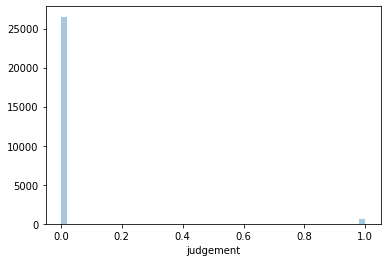

In [37]:
sns.distplot(train["judgement"], kde=False)

In [38]:
train["judgement"].value_counts()

0    26515
1      630
Name: judgement, dtype: int64

In [39]:
border = len(train[train["judgement"] == 1]) / len(train["judgement"])
print(border)

0.0232086940504697


### input の単語数の分布

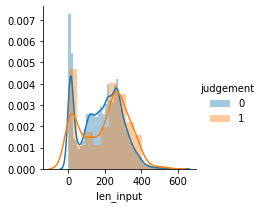

In [40]:
g = sns.FacetGrid(train[["judgement", "len_input"]], hue='judgement')
g.map(sns.distplot, 'len_input', label='judgement', hist=True, rug=False)
g.add_legend()

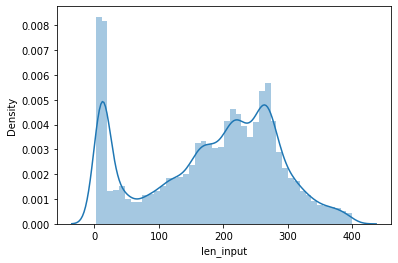

In [41]:
sns.distplot(test["len_input"], hist=True, rug=False)

## Load Models

In [42]:
if Config.validate:
    api = wandb.Api()

    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        try:
            run.file("oof_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        oof = pd.read_csv(f"{run_id}/oof_df.csv")[["id", "preds"]]
        oof.columns = ["id", f"preds{n}"]
        train = pd.merge(train, oof, on="id")
    
    print(train.columns)

In [43]:
if Config.inference:
    api = wandb.Api()
    inference_models = []

    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        inference_model = {}
        inference_model["run_id"] = run_id
        inference_model["model_name"] = run.config["model_name"]

        for fold in range(config.n_fold):
            try:
                run.file(f"{inference_model['model_name'].replace('/', '-')}_fold{fold}_best.pth").download(run_id)
            except wandb.CommError:
                # Already downloaded.
                pass

            model_preds = torch.load(f"{run_id}/{inference_model['model_name'].replace('/', '-')}_fold{fold}_best.pth")
            inference_model[f"state_fold{fold}"] = model_preds["model"]
            inference_model[f"preds_fold{fold}"] = model_preds["preds"]

        inference_models.append(inference_model)
    
    print({m['run_id']: m['model_name'] for m in inference_models})

In [44]:
if Config.stack or Config.ensemble:
    api = wandb.Api()

    feat_id = 0
    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        try:
            run.file("validation_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        try:
            run.file("prediction_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        val = pd.read_csv(f"{run_id}/validation_df.csv")
        pred = pd.read_csv(f"{run_id}/prediction_df.csv")

        if Config.ensemble:
            cols = [c for c in val.columns if c.startswith("class_preds")]
        else:
            cols = [c for c in val.columns if c.startswith("preds") and c != "preds"]

        val = val[["id"] + cols]
        pred = pred[["id"] + cols]

        adjust_cols = ["id"] + [f"preds{n}" for n in range(feat_id, feat_id + len(cols))]
        val.columns = adjust_cols
        pred.columns = adjust_cols

        feat_id += len(cols)

        train = pd.merge(train, val, on="id")
        test = pd.merge(test, pred, on="id")

    train.drop("preds4", inplace=True, axis=1)
    test.drop("preds4", inplace=True, axis=1)

    print(f"train: {train.columns}")
    print(f"test: {test.columns}")

In [45]:
if Config.debug and not Config.stack:
    train = train.sample(n=1000, random_state=config.seed).reset_index(drop=True)
    test = test.sample(n=1000, random_state=config.seed).reset_index(drop=True)
    sub = sub.sample(n=1000, random_state=config.seed).reset_index(drop=True)

## CV Split

In [46]:
Fold = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[["judgement", "nan_abstract"]])):
    train.loc[val_index, "fold"] = int(n)
train["fold"] = train["fold"].astype(np.uint8)
print(train.groupby(["fold", "judgement", "nan_abstract"]).size())

fold  judgement  nan_abstract
0     0          0               163
                 1                33
      1          0                 4
1     0          0               164
                 1                33
      1          0                 3
2     0          0               164
                 1                32
      1          0                 3
                 1                 1
3     0          0               163
                 1                33
      1          0                 4
4     0          0               163
                 1                33
      1          0                 3
                 1                 1
dtype: int64


## Utils

In [47]:
@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f"[{name}] start")
    yield
    LOGGER.info(f"[{name}] done in {time.time() - t0:.0f} s.")


def init_logger(log_file=OUTPUT_DIR + "train.log"):
    from logging import INFO, FileHandler, Formatter, StreamHandler, getLogger

    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger


LOGGER = init_logger()


def seed_torch(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True


seed_torch(seed=config.seed)


## Dataset

In [48]:
class BaseDataset(Dataset):
    def __init__(self, df, model_name, include_labels=True):
        tokenizer = T.AutoTokenizer.from_pretrained(model_name)

        self.df = df
        self.include_labels = include_labels

        self.title = df[config.input].tolist()
        self.encoded = tokenizer.batch_encode_plus(
            self.title,
            padding = 'max_length',            
            max_length = config.max_len,
            truncation = True,
            return_attention_mask=True
        )
        
        if self.include_labels:
            self.labels = df["judgement"].values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.encoded['input_ids'][idx])
        attention_mask = torch.tensor(self.encoded['attention_mask'][idx])

        if self.include_labels:
            label = torch.tensor(self.labels[idx]).float()
            return input_ids, attention_mask, label

        return input_ids, attention_mask


In [49]:
# Test

if config.model_name != "":

    train_ds = BaseDataset(train, config.model_name)

    for i in range(1):
        input_ids, attention_mask, label = train_ds[i]
        print(input_ids)
        print(attention_mask)
        print(f"label: {label}")


Downloading:   0%|          | 0.00/477 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

tensor([  101,  2259,  2568, 17163,  3864,  1104,  7300, 16147,  1621,  5351,
         1114,   173,  6834, 11708, 10294, 27375, 10496, 12176,  7031,   119,
         3582,   120,  8469,   131,  1175,  1132,  1374,  2527,  1115,   191,
         1348, 20043,  1103,  7300, 13950,  1104,  2833,  1114,  1664,   118,
         1821,  3965,  2941,  1143,  4820, 12176, 24034,  8341,  1880,   113,
          182,  6617,   114,   119,  1103,  6247,  1104,  1142,  2025,  1108,
         1106, 17459,  2259,  2568, 17163,  1766,  1104,  7300, 19024,  1170,
        25550,  1201,  1111,  5351,  1648,  1114,   173,  6834, 11708, 10294,
        27375,   182,  6617,   113,   173,  1306,  6617,   114,   170,  1423,
          118,  5777,  1104,   170,  3053,  1664,   118,  1821,  3965,  2941,
          182,  6617, 23470,   119,  4069,   131,  1195, 17428,  7300, 16147,
         1107,   170,  6876,  1104,  3961,  1141,  1385,  4457,  1114,   173,
         1306,  6617,   119,  7300,  1977,  4018,  1108,  3393, 

## Model

### BaseModel

In [50]:
if config.model_name != "":
    print(T.AutoConfig.from_pretrained(config.model_name))

BertConfig {
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.10.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



In [51]:
class BaseModel(nn.Module):
    def __init__(self, model_name):
        super().__init__()

        if "base" in model_name or "L-12" in model_name or "scibert" in model_name:
            out_dim = 768
        elif "large" in model_name or "L-24" in model_name:
            out_dim = 1024

        auto_config = T.AutoConfig.from_pretrained(model_name)
        auto_config.update({
            "output_hidden_states": True,
            "hidden_dropout_prob": config.dropout,
            # "layer_norm_eps": 1e-7,
        })
        
        self.auto_model = T.AutoModel.from_pretrained(model_name, config=auto_config)  

        self.attention = nn.Sequential(
            nn.Linear(out_dim, 512),            
            nn.Tanh(),                       
            nn.Linear(512, 1),
            nn.Softmax(dim=1)
        )        

        self.regressor = nn.Sequential(
            nn.Linear(out_dim, 1)                        
        )

        if config.reinit_layers > 0:
            self.re_init()

        if config.freeze_layers > 0:
            self.freeze()

    def forward(self, input_ids, attention_mask):
        bert_output = self.auto_model(input_ids=input_ids, attention_mask=attention_mask)        

        # There are a total of 13 layers of hidden states.
        # 1 for the embedding layer, and 12 for the 12 Roberta layers.
        # We take the hidden states from the last Roberta layer.
        last_layer_hidden_states = bert_output.hidden_states[-1]

        # The number of cells is config.max_len.
        # The size of the hidden state of each cell is 768 (for roberta-base).
        # In order to condense hidden states of all cells to a context vector,
        # we compute a weighted average of the hidden states of all cells.
        # We compute the weight of each cell, using the attention neural network.
        weights = self.attention(last_layer_hidden_states)
                
        # weights.shape is config.batch_size x config.max_len x 1
        # last_layer_hidden_states.shape is config.batch_size x config.max_len x 768        
        # Now we compute context_vector as the weighted average.
        # context_vector.shape is config.batch_size x 768
        context_vector = torch.sum(weights * last_layer_hidden_states, dim=1)        
        
        # Now we reduce the context vector to the prediction score.
        out = self.regressor(context_vector).squeeze()

        return out

    def re_init(self):
        # re-init pooler
        self.auto_model.pooler.dense.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
        self.auto_model.pooler.dense.bias.data.zero_()
        for p in self.auto_model.pooler.parameters():
            p.requires_grad = True

        # re-init encoder
        layers = self.auto_model.encoder.layer[-config.reinit_layers:]
        for layer in layers:
            for module in layer.modules():
                if isinstance(module, nn.Linear):
                    # Slightly different from the TF version which uses truncated_normal for initialization
                    # cf https://github.com/pytorch/pytorch/pull/5617
                    module.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
                    if module.bias is not None:
                        module.bias.data.zero_()
                elif isinstance(module, nn.Embedding):
                    module.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
                    if module.padding_idx is not None:
                        module.weight.data[module.padding_idx].zero_()
                elif isinstance(module, nn.LayerNorm):
                    module.bias.data.zero_()
                    module.weight.data.fill_(1.0)

    def freeze(self):
        # freeze embedding
        for param in self.auto_model.embeddings.parameters():
            param.requires_grad = False

        # freeze encoder
        layers = self.auto_model.encoder.layer[:config.freeze_layers]
        for layer in layers:
            for param in layer.parameters():
                param.requires_grad = False

In [52]:
# Test

if config.model_name != "":

    model = BaseModel(config.model_name)
    print(model)

    train_dataset = BaseDataset(train, config.model_name)
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, drop_last=True)

    for input_ids, attention_mask, labels in train_loader:
        output = model(input_ids, attention_mask)
        print(output)
        break


Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BaseModel(
  (auto_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [53]:
# Test

if config.model_name != "":
    for n, (name, tensor) in enumerate(list(model.named_parameters())):
        print(f"{n:>4}: {tensor.requires_grad}, {name}")

   0: True, auto_model.embeddings.word_embeddings.weight
   1: True, auto_model.embeddings.position_embeddings.weight
   2: True, auto_model.embeddings.token_type_embeddings.weight
   3: True, auto_model.embeddings.LayerNorm.weight
   4: True, auto_model.embeddings.LayerNorm.bias
   5: True, auto_model.encoder.layer.0.attention.self.query.weight
   6: True, auto_model.encoder.layer.0.attention.self.query.bias
   7: True, auto_model.encoder.layer.0.attention.self.key.weight
   8: True, auto_model.encoder.layer.0.attention.self.key.bias
   9: True, auto_model.encoder.layer.0.attention.self.value.weight
  10: True, auto_model.encoder.layer.0.attention.self.value.bias
  11: True, auto_model.encoder.layer.0.attention.output.dense.weight
  12: True, auto_model.encoder.layer.0.attention.output.dense.bias
  13: True, auto_model.encoder.layer.0.attention.output.LayerNorm.weight
  14: True, auto_model.encoder.layer.0.attention.output.LayerNorm.bias
  15: True, auto_model.encoder.layer.0.intermed

### StackingModel

## Optimizer

In [54]:
def bert_optimizer(model):
    named_parameters = list(model.named_parameters())    
    
    if "albert-base" in config.model_name:
        bert_parameters = named_parameters[:23]    
        attention_parameters = named_parameters[25:29]
        regressor_parameters = named_parameters[29:]
        second_block = 999
        third_block = 999

    elif "base" in config.model_name or "L-12" in config.model_name or "scibert" in config.model_name:
        bert_parameters = named_parameters[:197]    
        attention_parameters = named_parameters[199:203]
        regressor_parameters = named_parameters[203:]
        second_block = 69
        third_block = 133

    elif "large" in config.model_name or "L-24" in config.model_name:
        bert_parameters = named_parameters[:388]    
        attention_parameters = named_parameters[391:395]
        regressor_parameters = named_parameters[395:]
        second_block = 133
        third_block = 261
        
    attention_group = [params for (name, params) in attention_parameters]
    regressor_group = [params for (name, params) in regressor_parameters]

    parameters = []
    parameters.append({"params": attention_group})
    parameters.append({"params": regressor_group})

    for layer_num, (name, params) in enumerate(bert_parameters):
        weight_decay = 0.0 if "bias" in name else config.weight_decay

        lr = config.lr

        if layer_num >= second_block:        
            lr = config.lr_69

        if layer_num >= third_block:
            lr = config.lr_133

        parameters.append({"params": params, "weight_decay": weight_decay, "lr": lr})

    return T.AdamW(parameters)


## Loss

In [55]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-7):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self, yhat, y):
        loss = torch.sqrt(self.mse(yhat, y) + self.eps)
        return loss

In [56]:
# https://gist.github.com/SuperShinyEyes/dcc68a08ff8b615442e3bc6a9b55a354
class FBetaLoss(nn.Module):

    def __init__(self, beta=1.0, epsilon=1e-7):
        super().__init__()
        self.beta = beta
        self.epsilon = epsilon
        
    def forward(self, y_pred, y_true):
        tp = (y_true * y_pred).sum(dim=0).to(torch.float32)
        tn = ((1 - y_true) * (1 - y_pred)).sum(dim=0).to(torch.float32)
        fp = ((1 - y_true) * y_pred).sum(dim=0).to(torch.float32)
        fn = (y_true * (1 - y_pred)).sum(dim=0).to(torch.float32)

        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)

        beta_squared = self.beta ** 2
        fbeta = (1 + beta_squared) * precision * recall / (beta_squared * precision + recall + self.epsilon)
        fbeta = fbeta.clamp(min=self.epsilon, max=1-self.epsilon)
        return 1 - fbeta.mean()

## Scoring

In [57]:
def get_score(y_true, y_pred, b=border):
    y_pred = np.where(y_pred < b, 0, 1)
    return fbeta_score(y_true, y_pred, beta=7.0)

In [58]:
def get_result(result_df, fold=config.n_fold):
    preds = result_df["preds"].values
    labels = result_df["judgement"].values
    score = get_score(labels, preds)
    LOGGER.info(f"Score: {score:<.5f}")
    # wandb.log({"fold": fold, "CV": score})
    if fold == config.n_fold:
        wandb.run.summary[f"CV"] = score
    else:
        wandb.run.summary[f"CV_fold{fold}"] = score


In [59]:
def determine_border(b, y_true, y_pred):
    return -1 * get_score(y_true, y_pred, b)


## Helper functions

In [60]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return "%dm %ds" % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return "%s (remain %s)" % (asMinutes(s), asMinutes(rs))

In [61]:
def pre_train_fn():
    tokenizer = T.AutoTokenizer.from_pretrained(config.model_name)
    model = T.AutoModelForMaskedLM.from_pretrained(config.model_name)

    tokenizer.save_pretrained(f"./pretrained_{config.model_name}")

    train_dataset = T.LineByLineTextDataset(tokenizer=tokenizer, file_path="abstracts.txt", block_size=512)
    valid_dataset = T.LineByLineTextDataset(tokenizer=tokenizer, file_path="abstracts.txt", block_size=512)

    data_collator = T.DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=True, mlm_probability=0.15
    )

    training_args = T.TrainingArguments(
        output_dir = f"./pretrained_{config.model_name}_chk",
        overwrite_output_dir = True,
        num_train_epochs = 5,
        per_device_train_batch_size = 4,
        per_device_eval_batch_size = 4,
        gradient_accumulation_steps = 4,
        evaluation_strategy = 'steps',
        save_total_limit = 2,
        eval_steps = 105,
        save_steps = 105,
        metric_for_best_model = 'eval_loss',
        greater_is_better = False,
        load_best_model_at_end = True,
        prediction_loss_only = True,
        report_to = "wandb",
    )

    trainer = T.Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
    )

    trainer.train()

    trainer.save_model(f"./pretrained_{config.model_name}")

In [62]:
def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()

    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    optimizer.zero_grad()

    for step, (input_ids, attention_mask, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)

        y_preds = model(input_ids, attention_mask)

        loss = criterion(y_preds, labels)

        # record loss
        losses.update(loss.item(), batch_size)
        if config.gradient_accumulation_steps > 1:
            loss = loss / config.gradient_accumulation_steps
            
        if Config.apex:
            with amp.scale_loss(loss, optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            loss.backward()

        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)

        if (step + 1) % config.gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

            if isinstance(scheduler, ReduceLROnPlateau):
                scheduler.step(avg_val_loss)
            else:
                scheduler.step()
            
            global_step += 1

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if step % Config.print_freq == 0 or step == (len(train_loader) - 1):
            print(
                f"Epoch: [{epoch + 1}][{step}/{len(train_loader)}] "
                f"Elapsed {timeSince(start, float(step + 1) / len(train_loader)):s} "
                f"Loss: {losses.avg:.4f} "
                f"Grad: {grad_norm:.4f} "
                # f"LR: {scheduler.get_last_lr()[0]:.6f}  "
                f"LR: {scheduler.get_lr()[0]:.6f}  "
            )

    return losses.avg

In [63]:
def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()

    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()

    for step, (input_ids, attention_mask, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)

        # compute loss
        with torch.no_grad():
            y_preds = model(input_ids, attention_mask)

        loss = criterion(y_preds, labels)
        losses.update(loss.item(), batch_size)

        # record score
        # preds.append(y_preds.softmax(1).to("cpu").numpy())
        preds.append(y_preds.to("cpu").numpy())
        if config.gradient_accumulation_steps > 1:
            loss = loss / config.gradient_accumulation_steps

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if step % Config.print_freq == 0 or step == (len(valid_loader) - 1):
            print(
                f"EVAL: [{step}/{len(valid_loader)}] "
                f"Elapsed {timeSince(start, float(step + 1) / len(valid_loader)):s} "
                f"Loss: {losses.avg:.4f} "
            )
    predictions = np.concatenate(preds)
    return losses.avg, predictions

In [64]:
def inference():
    predictions = sub.copy()

    for n, model_item in enumerate(inference_models):
        test_dataset = BaseDataset(test, model_item['model_name'], include_labels=False)
        test_loader = DataLoader(
            test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers, pin_memory=True
        )

        preds = []
        for fold in range(config.n_fold):
            LOGGER.info(f"========== ID: {model_item['run_id']} model: {model_item['model_name']} fold: {fold} inference ==========")
            model = BaseModel(model_item['model_name'])
            model.to(device)
            model.load_state_dict(model_item[f"state_fold{fold}"])
            model.eval()
            fold_preds = []
            for i, (input_ids, attention_mask) in tqdm(enumerate(test_loader), total=len(test_loader)):
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                with torch.no_grad():
                    y_preds = model(input_ids, attention_mask)
                # avg_preds.append(y_preds.softmax(1).to("cpu").numpy())
                fold_preds.append(y_preds.to("cpu").numpy())
            preds.append(np.concatenate(fold_preds))

        preds = np.mean(preds, axis=0)

        if config.criterion == "BCEWithLogitsLoss":
            preds = 1 / (1 + np.exp(-preds))

        predictions[f"preds{n}"] = preds

    return predictions

In [65]:
def stacking_inference():
    feature_cols = [col for col in test.columns if col.startswith("preds")]
    # predictions = sub.copy()

    preds = []
    for fold in range(config.n_fold):
        LOGGER.info(f"========== fold: {fold} inference ==========")
        bst = lgb.Booster(model_file=OUTPUT_DIR + f"lgb_fold{fold}_best.txt")
        fold_preds = bst.predict(test[feature_cols])
        preds.append(fold_preds)

    preds = np.mean(preds, axis=0)
    # predictions[f"preds"] = preds

    return preds

## Train loop

In [66]:
def train_loop(df, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # Data Loader
    # ====================================================
    trn_idx = df[df["fold"] != fold].index
    val_idx = df[df["fold"] == fold].index

    train_folds = df.loc[trn_idx].reset_index(drop=True)
    valid_folds = df.loc[val_idx].reset_index(drop=True)

    train_dataset = BaseDataset(train_folds, config.model_name)
    valid_dataset = BaseDataset(valid_folds, config.model_name)

    train_loader = DataLoader(
        train_dataset,
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=True,
    )
    valid_loader = DataLoader(
        valid_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=False,
    )

    # ====================================================
    # Optimizer
    # ====================================================
    def get_optimizer(model):
        if config.optimizer == "Adam":
            optimizer = Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay, amsgrad=False)
        elif config.optimizer == "AdamW":
            optimizer = T.AdamW(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
        elif config.optimizer == "BertAdamW":
            optimizer = bert_optimizer(model)
        return optimizer

    # ====================================================
    # Scheduler
    # ====================================================
    def get_scheduler(optimizer):
        if config.scheduler == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer, mode="min", factor=config.factor, patience=config.patience, verbose=True, eps=config.eps
            )
        elif config.scheduler == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(optimizer, T_max=config.T_max, eta_min=config.min_lr, last_epoch=-1)
        elif config.scheduler == "CosineAnnealingWarmRestarts":
            scheduler = CosineAnnealingWarmRestarts(
                optimizer, T_0=config.T_0, T_mult=1, eta_min=config.min_lr, last_epoch=-1
            )
        elif config.scheduler == "CosineAnnealingWarmupRestarts":
            scheduler = CosineAnnealingWarmupRestarts(
                optimizer, first_cycle_steps=config.first_cycle_steps, max_lr=config.lr, min_lr=config.min_lr, warmup_steps=config.warmup_steps
            )
        elif config.scheduler == "get_cosine_schedule_with_warmup":
            scheduler = T.get_cosine_schedule_with_warmup(
                optimizer,
                num_training_steps=config.num_training_steps, 
                num_warmup_steps=config.num_warmup_steps
            )
        return scheduler

    # ====================================================
    # Model
    # ====================================================
    model = BaseModel(config.model_name)
    model.to(device)

    # Use multi GPU
    if device == torch.device("cuda") and not Config.apex and Config.multi_gpu:
        model = torch.nn.DataParallel(model)  # make parallel
        # torch.backends.cudnn.benchmark=True

    optimizer = get_optimizer(model)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # Apex
    # ====================================================
    if Config.apex:
        model, optimizer = amp.initialize(model, optimizer, opt_level="O1", verbosity=0)

    # ====================================================
    # Criterion
    # ====================================================
    def get_criterion():
        if config.criterion == "CrossEntropyLoss":
            criterion = nn.CrossEntropyLoss()
        elif config.criterion == "BCEWithLogitsLoss":
            criterion = nn.BCEWithLogitsLoss()
        elif config.criterion == "MSELoss":
            criterion = nn.MSELoss()
        elif config.criterion == "RMSELoss":
            criterion = RMSELoss()
        elif config.criterion == "FBetaLoss":
            criterion = FBetaLoss(7.0)

        return criterion

    criterion = get_criterion()

    # ====================================================
    # Loop
    # ====================================================
    best_score = -1
    best_loss = np.inf
    best_preds = None

    # if not Config.multi_gpu:
    #     wandb.watch(model, log_freq=Config.print_freq)

    for epoch in range(config.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        valid_labels = valid_folds["judgement"].values

        # if isinstance(scheduler, ReduceLROnPlateau):
        #     scheduler.step(avg_val_loss)
        # else:
        #     scheduler.step()

        if config.criterion == "BCEWithLogitsLoss":
            preds = 1 / (1 + np.exp(-preds))

        # scoring
        # score = get_score(valid_labels, preds.argmax(1))
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(
            f"Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s"
        )
        LOGGER.info(f"Epoch {epoch+1} - Score: {score}")

        wandb.log(
            {
                "epoch": epoch + 1,
                f"loss/train_fold{fold}": avg_loss,
                f"loss/val_fold{fold}": avg_val_loss,
                f"score/fold{fold}": score,
            }
        )

        if (
            (config.best == "score" and score > best_score)
            or (config.best == "loss" and avg_val_loss < best_loss)
        ):
            best_score = score
            best_loss = avg_val_loss
            best_preds = preds

            LOGGER.info(f"Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model (Loss: {best_loss:.4f})")
            wandb.run.summary[f"loss_fold{fold}"] = score

            torch.save(
                {"model": model.state_dict(), "preds": preds}, OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth"
            )
            wandb.save(OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth")

        # if epoch == config.epochs - 1:
        #     LOGGER.info(f"Epoch {epoch+1} - Save final model")
        #     torch.save(
        #         {"model": model.state_dict(), "preds": preds}, OUTPUT_DIR + f"{config.model_name}_fold{fold}_final.pth"
        #     )

    check_point = torch.load(OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth")

    if config.n_class == 1:
        valid_folds["preds"] = best_preds
    else:
        valid_folds[[str(c) for c in range(config.n_class)]] = best_preds
        valid_folds["preds"] = best_preds.argmax(1)

    return valid_folds

## Stack loop

In [67]:
def stack_loop(df, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")
    start_time = time.time()

    # ====================================================
    # Dataset
    # ====================================================
    trn_idx = df[df["fold"] != fold].index
    val_idx = df[df["fold"] == fold].index

    train_folds = df.loc[trn_idx].reset_index(drop=True)
    valid_folds = df.loc[val_idx].reset_index(drop=True)

    feature_cols = [col for col in df.columns if col.startswith("preds")]
    label_cols = ["judgement"]

    train_dataset = lgb.Dataset(data=train_folds[feature_cols], label=train_folds[label_cols], free_raw_data=False)
    valid_dataset = lgb.Dataset(data=valid_folds[feature_cols], label=valid_folds[label_cols], free_raw_data=False)

    # ====================================================
    # Parameters
    # ====================================================

    lgb_params = {
        "objective": config.objective,
        "metric": config.criterion,
        "num_class": config.n_class,
        "device_type": "gpu" if torch.cuda.is_available() else "cpu",
        "seed": seed + fold,
        "verbosity": -1,
    }

    if not Config.stack_optuna:
        lgb_params_manual = {
            "learning_rate": config.lr,
            "max_depth": config.max_depth,
            "num_leaves": config.num_leaves,
            "min_data_in_leaf": config.min_data_in_leaf,
            "drop_rate": config.dropout,
        }
        lgb_params.update(lgb_params_manual)

    # ====================================================
    # Loop
    # ====================================================

    evaluation_results = {}
    clf = lgb.train(
        params=lgb_params,
        train_set=train_dataset,
        num_boost_round=10000,
        valid_sets=[train_dataset, valid_dataset], 
        valid_names=['train', 'eval'],
        early_stopping_rounds=100,
        evals_result=evaluation_results,
        verbose_eval=100,
    )

    importances = pd.DataFrame({
        'features': clf.feature_name(),
        'importance': clf.feature_importance()
    }).sort_values('importance', ascending=False)

    preds = clf.predict(valid_folds[feature_cols], num_iteration=clf.best_iteration)
    valid_labels = valid_folds["judgement"].values

    if Config.stack_optuna:
        LOGGER.info(f"Best Params {fold} - {clf.params}")

    # scoring
    if config.n_class == 1:
        score = get_score(valid_labels, preds)
    else:
        score = get_score(valid_labels, preds.argmax(1))

    elapsed = time.time() - start_time

    LOGGER.info(f"Result {fold} - Score: {score}, time: {elapsed:.0f}s")

    LOGGER.info(f"Result {fold} - Save Best Model")
    # wandb.run.summary[f"loss_fold{fold}"] = score

    clf.save_model(OUTPUT_DIR + f"lgb_fold{fold}_best.txt", clf.best_iteration)
    wandb.save(OUTPUT_DIR + f"lgb_fold{fold}_best.txt")

    if config.n_class == 1:
        valid_folds["preds"] = preds
    else:
        valid_folds[[str(c) for c in range(config.n_class)]] = preds
        valid_folds["preds"] = preds.argmax(1)

    return valid_folds

## Main


In [68]:
def main():
    # ====================================================
    # Pre Training
    # ====================================================
    if Config.pre_train:
        abstract_df = pd.concat([train["abstract"], test["abstract"]])
        abstracts  = '\n'.join(abstract_df.tolist())
        with open("abstracts.txt", "w") as f:
            f.write(abstracts)

        pre_train_fn()

    # ====================================================
    # Training
    # ====================================================
    if Config.train:
        oof_df = pd.DataFrame()
        for fold in range(config.n_fold):
            seed_torch(seed + fold)

            _oof_df = train_loop(train, fold)
            oof_df = pd.concat([oof_df, _oof_df])
            LOGGER.info(f"========== fold: {fold} result ==========")
            get_result(_oof_df, fold)
            
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        
        # save result
        oof_df.to_csv(OUTPUT_DIR + "oof_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "oof_df.csv")

    # ====================================================
    # Validation
    # ====================================================
    if Config.validate:
        probs = []
        borders = []
        class_cols = []

        for n in range(len(config.inference_runs)):
            probs.append(train[f"preds{n}"].values)

            if config.border == "minimize":
                res = sp.optimize.minimize_scalar(
                    determine_border,
                    method='bounded',
                    bounds=(0, 1),
                    args=(train["judgement"].values, train[f"preds{n}"].values)
                )
                b = res.x

                # CV result
                LOGGER.info(f"========== Border Optimization ==========")
                LOGGER.info(f"Border: {b:<.5f}, Score: {-res.fun:<.5f}")

            else:
                raise f"Invalid config.border parameter: {config.border}"

            borders.append(b)
            class_cols.append(f"class_preds{n}")
            train[f"class_preds{n}"] = np.where(train[f"preds{n}"].values < b, 0, 1)

        train["voting"] = train[class_cols].sum(axis=1)
        train["preds"] = np.where(train["voting"].values < len(config.inference_runs) / 2, 0, 1)

        LOGGER.info(f"========== CV ==========")
        get_result(train)

        # save result
        train.to_csv(OUTPUT_DIR + "validation_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "validation_df.csv")

    # ====================================================
    # Inference
    # ====================================================
    if Config.inference:
        prediction_df = inference()

        probs = []
        for n in range(len(config.inference_runs)):
            probs.append(prediction_df[f"preds{n}"].values)

            prediction_df[f"class_preds{n}"] = np.where(prediction_df[f"preds{n}"].values < borders[n], 0, 1)

        prediction_df["voting"] = prediction_df[class_cols].sum(axis=1)
        prediction_df["preds"] = np.where(prediction_df["voting"].values < len(config.inference_runs) / 2, 0, 1)

        # submission
        sub["judgement"] = prediction_df["preds"]  # .argmax(1)
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        prediction_df.to_csv(OUTPUT_DIR + "prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "prediction_df.csv")
        
    # ====================================================
    # Stack
    # ====================================================
    if Config.stack:
        # Training
        oof_df = pd.DataFrame()
        for fold in range(config.n_fold):
            seed_torch(seed + fold)

            _oof_df = stack_loop(train, fold)
            oof_df = pd.concat([oof_df, _oof_df])
            LOGGER.info(f"========== fold: {fold} result ==========")
            get_result(_oof_df, fold)

        # CV result
        if config.n_class > 1 or config.border == "fixed":
            # CV result
            LOGGER.info(f"========== CV ==========")
            get_result(oof_df)
            b = border

        elif config.border == "minimize":
            res = sp.optimize.minimize_scalar(determine_border, method='bounded', bounds=(0, 1), args=(oof_df["judgement"].values, oof_df["preds"].values))
            LOGGER.info(f"========== CV: Border Optimization ==========")
            LOGGER.info(f"Border: {res.x:<.5f}, Score: {-res.fun:<.5f}")
            wandb.run.summary[f"CV"] = -res.fun
            b = res.x

        if config.n_class == 1:
            wandb.run.summary[f"border"] = b

        if config.n_class == 1:
            oof_df["class_preds"] = np.where(oof_df["preds"].values < b, 0, 1)
        else:
            oof_df["class_preds"] = oof_df["preds"].values.argmax(1)

        # save result
        oof_df.to_csv(OUTPUT_DIR + "stacking_oof_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "stacking_oof_df.csv")

        # Inference
        preds = stacking_inference()

        if config.n_class == 1:
            predictions = np.where(preds < b, 0, 1)
        else:
            predictions = preds.argmax(1)

        # submission
        sub["judgement"] = predictions
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        sub.rename(columns={'judgement': "class_preds"}, inplace=True)

        if config.n_class == 1:
            sub["preds"] = preds
        else:
            sub[[str(c) for c in range(config.n_class)]] = preds
            sub["preds"] = preds.argmax(1)

        sub.to_csv(OUTPUT_DIR + "stacking_prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "stacking_prediction_df.csv")
                
    # ====================================================
    # Ensemble
    # ====================================================
    if Config.ensemble:
        cols = [c for c in train.columns if c.startswith("preds") and c != "preds"]

        train["voting"] = train[cols].sum(axis=1)
        train["preds"] = np.where(train["voting"].values < len(cols) / 2, 0, 1)

        LOGGER.info(f"========== CV ==========")
        get_result(train)

        test["voting"] = test[cols].sum(axis=1)
        test["preds"] = np.where(test["voting"].values < len(cols) / 2, 0, 1)

        # submission
        sub["judgement"] = test["preds"]  # .argmax(1)
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        test.to_csv(OUTPUT_DIR + "prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "prediction_df.csv")

In [69]:
if __name__ == "__main__":
    main()

========== fold: 0 training ==========
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/66] Elapsed 0m 0s (remain 0m 38s) Loss: 0.4894 Grad: 3.9347 LR: 0.000000  
Epoch: [1][10/66] Elapsed 0m 3s (remain 0m 16s) Loss: 0.4483 Grad: 1.8810 LR: 0.000100  
Epoch: [1][20/66] Elapsed 0m 6s (remain 0m 13s) Loss: 0.3401 Grad: 0.4806 LR: 0.000200  
Epoch: [1][30/66] Elapsed 0m 8s (remain 0m 10s) Loss: 0.2467 Grad: 0.0909 LR: 0.000300  
Epoch: [1][40/66] Elapsed 0m 11s (remain 0m 7s) Loss: 0.1986 Grad: 0.0277 LR: 0.000400  
Epoch: [1][50/66] Elapsed 0m 14s (remain 0m 4s) Loss: 0.1601 Grad: 0.0173 LR: 0.000500  
Epoch: [1][60/66] Elapsed 0m 17s (remain 0m 1s) Loss: 0.1763 Grad: 0.9353 LR: 0.000600  
Epoch: [1][65/66] Elapsed 0m 18s (remain 0m 0s) Loss: 0.1699 Grad: 0.3455 LR: 0.000660  
EVAL: [0/17] Elapsed 0m 0s (remain 0m 5s) Loss: 0.0233 
EVAL: [10/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0777 


Epoch 1 - avg_train_loss: 0.1699  avg_val_loss: 0.0955  time: 21s
Epoch 1 - Score: 0.5244755244755245
Epoch 1 - Save Best Score: 0.5245 Model (Loss: 0.0955)


EVAL: [16/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0955 


========== fold: 0 result ==========
Score: 0.52448
========== fold: 1 training ==========
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/66] Elapsed 0m 0s (remain 0m 33s) Loss: 0.6686 Grad: 4.5023 LR: 0.000000  
Epoch: [1][10/66] Elapsed 0m 3s (remain 0m 16s) Loss: 0.5820 Grad: 3.3196 LR: 0.000100  
Epoch: [1][20/66] Elapsed 0m 6s (remain 0m 13s) Loss: 0.4314 Grad: 0.4592 LR: 0.000200  
Epoch: [1][30/66] Elapsed 0m 8s (remain 0m 9s) Loss: 0.3458 Grad: 0.1228 LR: 0.000300  
Epoch: [1][40/66] Elapsed 0m 11s (remain 0m 7s) Loss: 0.2931 Grad: 1.8214 LR: 0.000400  
Epoch: [1][50/66] Elapsed 0m 14s (remain 0m 4s) Loss: 0.2539 Grad: 0.0901 LR: 0.000500  
Epoch: [1][60/66] Elapsed 0m 17s (remain 0m 1s) Loss: 0.2257 Grad: 0.8310 LR: 0.000600  
Epoch: [1][65/66] Elapsed 0m 18s (remain 0m 0s) Loss: 0.2194 Grad: 0.3385 LR: 0.000660  
EVAL: [0/17] Elapsed 0m 0s (remain 0m 5s) Loss: 0.0373 
EVAL: [10/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.1072 


Epoch 1 - avg_train_loss: 0.2194  avg_val_loss: 0.0839  time: 20s
Epoch 1 - Score: 0.47923322683706066
Epoch 1 - Save Best Score: 0.4792 Model (Loss: 0.0839)


EVAL: [16/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0839 


========== fold: 1 result ==========
Score: 0.47923
========== fold: 2 training ==========
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/66] Elapsed 0m 0s (remain 0m 33s) Loss: 0.7039 Grad: 5.3264 LR: 0.000000  
Epoch: [1][10/66] Elapsed 0m 3s (remain 0m 16s) Loss: 0.6255 Grad: 3.3868 LR: 0.000100  
Epoch: [1][20/66] Elapsed 0m 6s (remain 0m 13s) Loss: 0.4519 Grad: 0.9619 LR: 0.000200  
Epoch: [1][30/66] Elapsed 0m 8s (remain 0m 10s) Loss: 0.3502 Grad: 0.1309 LR: 0.000300  
Epoch: [1][40/66] Elapsed 0m 11s (remain 0m 7s) Loss: 0.3067 Grad: 0.8669 LR: 0.000400  
Epoch: [1][50/66] Elapsed 0m 14s (remain 0m 4s) Loss: 0.2477 Grad: 0.0641 LR: 0.000500  
Epoch: [1][60/66] Elapsed 0m 17s (remain 0m 1s) Loss: 0.2286 Grad: 0.1077 LR: 0.000600  
Epoch: [1][65/66] Elapsed 0m 18s (remain 0m 0s) Loss: 0.2174 Grad: 0.6300 LR: 0.000660  
EVAL: [0/17] Elapsed 0m 0s (remain 0m 5s) Loss: 0.0168 
EVAL: [10/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0759 


Epoch 1 - avg_train_loss: 0.2174  avg_val_loss: 0.0987  time: 21s
Epoch 1 - Score: 0.0
Epoch 1 - Save Best Score: 0.0000 Model (Loss: 0.0987)


EVAL: [16/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0987 


========== fold: 2 result ==========
Score: 0.00000
========== fold: 3 training ==========
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/66] Elapsed 0m 0s (remain 0m 34s) Loss: 0.4654 Grad: 3.5331 LR: 0.000000  
Epoch: [1][10/66] Elapsed 0m 3s (remain 0m 16s) Loss: 0.4262 Grad: 2.3306 LR: 0.000100  
Epoch: [1][20/66] Elapsed 0m 6s (remain 0m 13s) Loss: 0.2877 Grad: 0.5468 LR: 0.000200  
Epoch: [1][30/66] Elapsed 0m 8s (remain 0m 10s) Loss: 0.2150 Grad: 0.1017 LR: 0.000300  
Epoch: [1][40/66] Elapsed 0m 11s (remain 0m 7s) Loss: 0.1746 Grad: 0.0256 LR: 0.000400  
Epoch: [1][50/66] Elapsed 0m 14s (remain 0m 4s) Loss: 0.1887 Grad: 0.2404 LR: 0.000500  
Epoch: [1][60/66] Elapsed 0m 17s (remain 0m 1s) Loss: 0.1777 Grad: 0.7489 LR: 0.000600  
Epoch: [1][65/66] Elapsed 0m 18s (remain 0m 0s) Loss: 0.1714 Grad: 1.1347 LR: 0.000660  
EVAL: [0/17] Elapsed 0m 0s (remain 0m 5s) Loss: 0.0374 
EVAL: [10/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0830 


Epoch 1 - avg_train_loss: 0.1714  avg_val_loss: 0.0988  time: 21s
Epoch 1 - Score: 0.5449591280653951
Epoch 1 - Save Best Score: 0.5450 Model (Loss: 0.0988)


EVAL: [16/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0988 


========== fold: 3 result ==========
Score: 0.54496
========== fold: 4 training ==========
Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/66] Elapsed 0m 0s (remain 0m 33s) Loss: 0.7807 Grad: 5.3560 LR: 0.000000  
Epoch: [1][10/66] Elapsed 0m 3s (remain 0m 16s) Loss: 0.6935 Grad: 3.7350 LR: 0.000100  
Epoch: [1][20/66] Elapsed 0m 6s (remain 0m 13s) Loss: 0.5035 Grad: 0.9406 LR: 0.000200  
Epoch: [1][30/66] Elapsed 0m 8s (remain 0m 10s) Loss: 0.3873 Grad: 0.1398 LR: 0.000300  
Epoch: [1][40/66] Elapsed 0m 11s (remain 0m 7s) Loss: 0.3138 Grad: 0.0489 LR: 0.000400  
Epoch: [1][50/66] Elapsed 0m 14s (remain 0m 4s) Loss: 0.2716 Grad: 0.0342 LR: 0.000500  
Epoch: [1][60/66] Elapsed 0m 17s (remain 0m 1s) Loss: 0.2633 Grad: 0.9094 LR: 0.000600  
Epoch: [1][65/66] Elapsed 0m 18s (remain 0m 0s) Loss: 0.2446 Grad: 0.5493 LR: 0.000660  
EVAL: [0/17] Elapsed 0m 0s (remain 0m 5s) Loss: 0.0291 
EVAL: [10/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.0841 


Epoch 1 - avg_train_loss: 0.2446  avg_val_loss: 0.1079  time: 21s
Epoch 1 - Score: 0.2967359050445104
Epoch 1 - Save Best Score: 0.2967 Model (Loss: 0.1079)


EVAL: [16/17] Elapsed 0m 1s (remain 0m 0s) Loss: 0.1079 


========== fold: 4 result ==========
Score: 0.29674
========== CV ==========
Score: 0.40027


In [70]:
wandb.finish()

## Public LB

In [71]:
RUN_PATH = ""
LB_SCORE = None

In [72]:
if LB_SCORE is not None:
    import wandb
    api = wandb.Api()

    run = api.run(RUN_PATH)
    run.summary["LB"] = LB_SCORE
    run.summary.update()